## Data Quality Evaluation: Netmums Preliminary Scrape
### Basic Search, Netmums, Blurbs/Titles only (not entire threads)

works with netmums scrape classes from BEFORE April 29, 2021

#### TODO

* count for each concern

* count for each pair. 

* ^^ to do this first we have to join queries and remove duplicate results. 

### Concerns

["Chemical contaminants",
"Endocrine disruptor",
"preservatives",
"sweeteners",
"additives",
"Pesticides",
"Veterinary drugs",
"GMO",
"Metals",
"Mycotoxin",
"Bisphenol A",
"Furan and furan-like molecules",
"DON",
"Dioxin and PCB",
"MOH",
"Mineral oil hydrocarbons",
"MOSH",
"MOAH",
"Nitrates",
"Acrylamid",
"Phtalates",
"Microbiologic contaminants",
"Salmonella",
"Campylobacter",
"Listeria",
"EColi",
"Cronobacter",
"Histamine",
"Other bacteria",
"Virus",
"Parasites"


### foods 
* infant formula

"formula","baby formula",

* sterizlized vegetable mixed with fish

"veggie baby food","vegetable baby food",

* fresh fruit puree mildly processed

"fruit puree","fruit baby food",

* infant cereals

"cereal for baby", "cereal"

In [14]:
import pandas as pd


In [15]:
import pickle as pk
from pathlib import Path #easier compatibility btwn different filesystems

In [16]:
import os
os.chdir(Path('/Users/sma/Documents/INRAE internship/scrape-git/netmums/nbks'))

In [17]:
mydict = pk.load(open(Path('../basicblurbs.pkl'),'rb'))

In [18]:
mydict.keys

<function dict.keys>

* formula subset: compile and then count.

In [19]:
#separate by food of interest.

# get a list of all values with a key containing the word 'formula'
formula_queries, formula_set = zip(*[(key, value) for key, value in mydict.items() if 'formula' in key])

#vegetable baby food
veg_queries, veg_set = zip(*[(key, value) for key, value in mydict.items() if 'veg' in key])

#fruit baby food
fruit_queries, fruit_set = zip(*[(key, value) for key, value in mydict.items() if 'fruit' in key])

#cereal
cereal_queries, cereal_set = zip(*[(key, value) for key, value in mydict.items() if 'cereal' in key])

In [20]:
print('FORMULA \n','\t total number of results:',sum([len(i) for i in formula_set]),
     '\n \t total successful searches:', sum([int(len(i) > 0) for i in formula_set]),
      '\n \t searches with no results:', sum([int(len(i) == 0) for i in formula_set])
     )

print('VEGETABLE BABY FOOD \n','\t total number of results:',sum([len(i) for i in veg_set]),
     '\n \t total successful searches:', sum([int(len(i) > 0) for i in veg_set]),
      '\n \t searches with no results:', sum([int(len(i) == 0) for i in veg_set])
     )

print('FRUIT BABY FOOD \n','\t total number of results:',sum([len(i) for i in fruit_set]),
     '\n \t total successful searches:', sum([int(len(i) > 0) for i in fruit_set]),
      '\n \t searches with no results:', sum([int(len(i) == 0) for i in fruit_set])
     )

print('CEREAL \n','\t total number of results:',sum([len(i) for i in cereal_set]),
     '\n \t total successful searches:', sum([int(len(i) > 0) for i in cereal_set]),
      '\n \t searches with no results:', sum([int(len(i) == 0) for i in cereal_set])
     )

FORMULA 
 	 total number of results: 1585 
 	 total successful searches: 47 
 	 searches with no results: 15
VEGETABLE BABY FOOD 
 	 total number of results: 1812 
 	 total successful searches: 51 
 	 searches with no results: 11
FRUIT BABY FOOD 
 	 total number of results: 1450 
 	 total successful searches: 44 
 	 searches with no results: 18
CEREAL 
 	 total number of results: 1191 
 	 total successful searches: 47 
 	 searches with no results: 15


### Understanding the Data Structure
feel free to skip if you don't care, this is just for reader to understand the code.

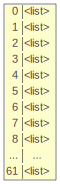

In [21]:
# visualize the structure for ease of understanding the data structure
#requires graphviz
import lolviz
lolviz.lolviz(formula_set)

#each yellow box is a set of results (up to 100 ) from a query green side bar)

approx 10 lists are empty. -> approx 10 queries had no results

formula_set is a list of list of dict.

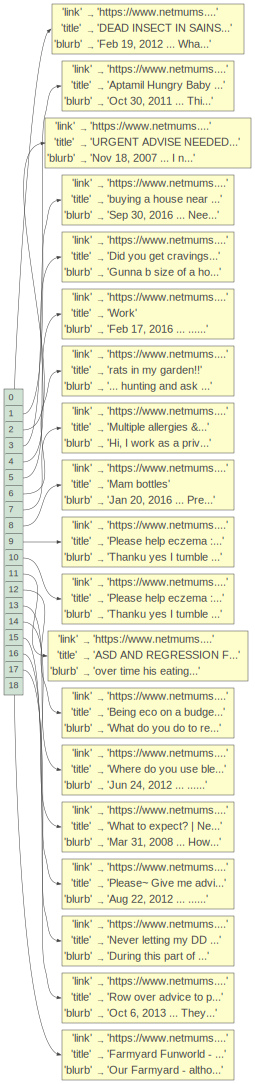

In [22]:
lolviz.objviz(formula_set[1])
#we can see this list of dict contains 18 dicts = 18 results for the query.
#note for larger results objviz will throw an error.
#we can see that formula_set is a list of dicts

the dicts contain three keys: link, title, and blurb.

Blurb is the preview text which was available in the search. We can use this to investigate the quality of our data, seeing how relevant it is to what we wanted to find. (if it is bad, we will try more involved search methods before we go to the step of scraping entire discussions?)

## look at the number of results for each concern per product

In [23]:
#which queries returned no results?
[key for key, value in mydict.items() if not value]

['https://www.netmums.com/search/chat/Chemical contaminants cereal',
 'https://www.netmums.com/search/chat/Endocrine disruptor cereal',
 'https://www.netmums.com/search/chat/Mycotoxin formula',
 'https://www.netmums.com/search/chat/Mycotoxin baby formula',
 'https://www.netmums.com/search/chat/Mycotoxin veggie baby food',
 'https://www.netmums.com/search/chat/Mycotoxin vegetable baby food',
 'https://www.netmums.com/search/chat/Mycotoxin fruit puree',
 'https://www.netmums.com/search/chat/Mycotoxin fruit baby food',
 'https://www.netmums.com/search/chat/Mycotoxin cereal for baby',
 'https://www.netmums.com/search/chat/Mycotoxin cereal',
 'https://www.netmums.com/search/chat/Bisphenol A fruit puree',
 'https://www.netmums.com/search/chat/Bisphenol A fruit baby food',
 'https://www.netmums.com/search/chat/Furan and furan-like molecules formula',
 'https://www.netmums.com/search/chat/Furan and furan-like molecules baby formula',
 'https://www.netmums.com/search/chat/Furan and furan-like m

In [24]:
concerns = ["Chemical contaminants","Endocrine disruptor","preservatives","sweeteners","additives","Pesticides","Veterinary drugs","GMO","Metals","Mycotoxin","Bisphenol A","Furan and furan-like molecules","DON","Dioxin and PCB","MOH","Mineral oil hydrocarbons","MOSH","MOAH","Nitrates","Acrylamid","Phtalates","Microbiologic contaminants","Salmonella","Campylobacter","Listeria","EColi","Cronobacter","Histamine","Other bacteria","Virus","Parasites"]

In [25]:
query_df = pd.DataFrame([(key[35:], len(value)) for key, value in mydict.items()], columns=['query', 'numResults']).sort_values('numResults')

In [26]:
query_df['concern'] = query_df['query'].apply(lambda x : next(
    i for i in concerns if i in x), None)
#WARNING: CASE SENSITIVE.

<AxesSubplot:ylabel='concern'>

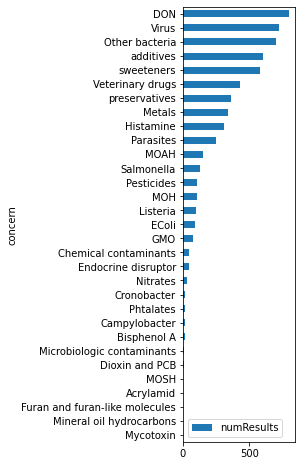

In [27]:
query_df.groupby('concern').sum().sort_values('numResults').plot.barh(figsize=(2,8))

### Convert to Dataframe for easier Investigation

In [28]:
import pandas as pd

In [29]:
#flatten the structure and pass it into a pandas dataframe
formula_df = pd.DataFrame(list([(mydict['link'], mydict['title'], mydict['blurb'] ) for sublist in formula_set for mydict in sublist]),
            columns=["link","title","blurb"])

veg_df = pd.DataFrame(list([(mydict['link'], mydict['title'], mydict['blurb'] ) for sublist in veg_set for mydict in sublist]),
            columns=["link","title","blurb"])

fruit_df = pd.DataFrame(list([(mydict['link'], mydict['title'], mydict['blurb'] ) for sublist in fruit_set for mydict in sublist]),
            columns=["link","title","blurb"])

cereal_df = pd.DataFrame(list([(mydict['link'], mydict['title'], mydict['blurb'] ) for sublist in cereal_set for mydict in sublist]),
            columns=["link","title","blurb"])

## Cleaning & Inspection
* remove duplicate results (same exact blurb)
* possibly remove subforums which would be irrelevant topics. (wine, contraception... etc)

In [30]:
#drop duplicates
#duplicates are results with the same blurb, meaning the exact same post in the same thread (title) has been captured.

formula_df = formula_df.drop_duplicates(subset=['blurb','title'])
veg_df = veg_df.drop_duplicates(subset=['blurb','title'])
fruit_df = fruit_df.drop_duplicates(subset=['blurb','title'])
cereal_df = cereal_df.drop_duplicates(subset=['blurb','title'])

In [31]:
# number of unique forum threads?

print(len(pd.unique(formula_df.title)),'\n',
      len(pd.unique(veg_df.title)),'\n',
      len(pd.unique(fruit_df.title)),'\n',
      len(pd.unique(cereal_df.title)))

936 
 1002 
 1008 
 738


In [32]:
#TODO
#I noticed that some blurbs are duplicated but have different titles...
formula_df.loc[formula_df.duplicated(subset='blurb', keep=False)].sort_values('blurb')

#It seems that there is an error in my scrape somehow, and so for some of the scrapes it is adding extra junk
#to the title...

#not really a huge issue, but since sometimes it is the subforum name it might interfere with 
#featurization later so I should probably fix it.

# IDEA I can also just drop the title which is longer.
#but I need to check to see if there are other titles which arent dupes which did this..

,link,title,blurb
743,https://www.netmums.com/coffeehouse/drop-clini...,Baby doesnt want milk since starting solids!!,Around 7 last bottle and bed. She loves the so...
695,https://www.netmums.com/coffeehouse/drop-clini...,Weaning Baby doesnt want milk since starting s...,Around 7 last bottle and bed. She loves the so...
1578,https://www.netmums.com/coffeehouse/drop-clini...,"3 month old, ready for baby rice? Help.","As like other mums have stated, throughout the..."
1566,https://www.netmums.com/coffeehouse/drop-clini...,"Weaning 3 month old, ready for baby rice? Help.","As like other mums have stated, throughout the..."
1464,https://www.netmums.com/coffeehouse/drop-clini...,9 Month Baby was sick and now will not drink Milk,"Dec 11, 2009 ... Hi Just wondered if someone c..."
1364,https://www.netmums.com/coffeehouse/drop-clini...,D N28rpv 9 Month Baby was sick and now will no...,"Dec 11, 2009 ... Hi Just wondered if someone c..."
1112,https://www.netmums.com/coffeehouse/drop-clini...,"Help! Baby still has ""colic"" at nearly 5 months !","Dec 18, 2012 ... My DS2 is STILL on colief and..."
1059,https://www.netmums.com/coffeehouse/drop-clini...,"kat27drl Help! Baby still has ""colic"" at nearl...","Dec 18, 2012 ... My DS2 is STILL on colief and..."
1477,https://www.netmums.com/coffeehouse/drop-clini...,baby is ill and won't drink milk - when should...,"Dec 23, 2009 ... hi My 5mth daughter is suffer..."
1401,https://www.netmums.com/coffeehouse/drop-clini...,Breastfeeding baby is ill and won't drink milk...,"Dec 23, 2009 ... hi My 5mth daughter is suffer..."


In [33]:
# how many duplicates did we miss? (due to error I need to correct...)

print(len(formula_df.loc[formula_df.duplicated(subset='blurb', keep=False)].sort_values('blurb'))/2.,'\n',
      len(veg_df.loc[veg_df.duplicated(subset='blurb', keep=False)].sort_values('blurb'))/2.,'\n',
      len(fruit_df.loc[fruit_df.duplicated(subset='blurb', keep=False)].sort_values('blurb'))/2.,'\n',
      len(cereal_df.loc[cereal_df.duplicated(subset='blurb', keep=False)].sort_values('blurb'))/2.)

20.0 
 0.0 
 15.0 
 7.0


theres very few duplicates... which posts are these? (to try to fix it...)

In [34]:
#find the searches which gave duplicate titles
def find_queries_from_title(string):
    return [(key, sublist['title']) for key, value in mydict.items() for sublist in value if string in sublist['title']]

In [35]:
find_queries_from_title('9 Month Baby was sick and now will not drink Milk')

[('https://www.netmums.com/search/chat/Virus formula',
  'D N28rpv 9 Month Baby was sick and now will not drink Milk'),
 ('https://www.netmums.com/search/chat/Virus baby formula',
  '9 Month Baby was sick and now will not drink Milk')]

In [36]:
find_queries_from_title('Baby doesnt want milk since starting solids!!')

[('https://www.netmums.com/search/chat/DON formula',
  'Weaning Baby doesnt want milk since starting solids!!'),
 ('https://www.netmums.com/search/chat/DON baby formula',
  'Baby doesnt want milk since starting solids!!'),
 ('https://www.netmums.com/search/chat/DON veggie baby food',
  'Baby doesnt want milk since starting solids!!'),
 ('https://www.netmums.com/search/chat/DON vegetable baby food',
  'Baby doesnt want milk since starting solids!!'),
 ('https://www.netmums.com/search/chat/DON fruit puree',
  'Weaning Baby doesnt want milk since starting solids!!'),
 ('https://www.netmums.com/search/chat/DON fruit baby food',
  'Baby doesnt want milk since starting solids!!'),
 ('https://www.netmums.com/search/chat/DON cereal for baby',
  'Baby doesnt want milk since starting solids!!'),
 ('https://www.netmums.com/search/chat/DON cereal',
  'Weaning Baby doesnt want milk since starting solids!!')]

after looking at some of the results, this problem is with the website server and so it is not a glitch in my code. I will have to decide a way to remove these extra duplicates


TODO (probably will find entries with the same blurb and different title and keep the shorter title. althought also this won't matter when getting to next step fo building the code.

In [37]:
#any('Baby doesnt want milk since starting solids!!' in formula_set['title'])
#[stuff for sublist in mydict.items() for stuff in sublist if]

#key for key, value in mydict.items() if 


#'hello' in myitem for myitem in sublist['title'] in mydict.items()
#value for key, value in mydict.items() if 'formula' in key

SyntaxError: invalid syntax (<ipython-input-37-c37b2991fc12>, line 7)

In [39]:
#[mydict.kefor sublist in formula_set for mydict in sublist]
#any('Baby doesnt want milk since starting solids!!' in mydict.items())

TypeError: 'bool' object is not iterable

In [40]:
# number of unique posts?
print(len(pd.unique(formula_df.blurb)),'\n',
      len(pd.unique(veg_df.blurb)),'\n',
      len(pd.unique(fruit_df.blurb)),'\n',
      len(pd.unique(cereal_df.blurb)))

1167 
 1191 
 1214 
 870


In [41]:
#for now we will remove the duplicates with the title error and keep going.
#TEMP
formula_df = formula_df.drop_duplicates(subset=['blurb'])
veg_df = veg_df.drop_duplicates(subset=['blurb'])
fruit_df = fruit_df.drop_duplicates(subset=['blurb'])
cereal_df = cereal_df.drop_duplicates(subset=['blurb'])

In [42]:
# What forum area is it located in?
#if we have a lot of results from irrelevant sub-forums that is a bad sign.

#using regex we extract the forum and subforum names.
# and add them to our existing df.

import re

def make_subforum_cols(my_df):
    if 'subforum' not in my_df.columns:
        my_df = \
        pd.concat([my_df,
            my_df.link.str.extract('https:\/\/www.netmums.com\/coffeehouse\/(?P<forum>[a-z\-0-9]+)\/(?P<subforum>[a-z\-0-9]+)'
                                        )
                  ], axis=1
                  )
    return my_df

In [43]:
formula_df = make_subforum_cols(formula_df)
veg_df = make_subforum_cols(veg_df)
fruit_df = make_subforum_cols(fruit_df)
cereal_df = make_subforum_cols(cereal_df)

In [44]:
veg_df

,link,title,blurb,forum,subforum
0,https://www.netmums.com/coffeehouse/other-chat...,DEAD INSECT IN SAINSBURYS FOOD!,"Feb 19, 2012 ... What would you do in your hon...",other-chat-514,general-chat-18
1,https://www.netmums.com/coffeehouse/drop-clini...,Multiple allergies & weaning!,"Hi, I work as a private nanny, currently with ...",drop-clinic-984,weaning-560
2,https://www.netmums.com/coffeehouse/other-chat...,Never letting my DD eat any of these...MacDona...,Trying for a baby · Pregnancy · Baby · Parenti...,other-chat-514,news-12
3,https://www.netmums.com/coffeehouse/becoming-m...,What to expect? | Netmums,"Mar 31, 2008 ... How long have you been trying...",becoming-mum-ttc-64,fertility-problems-39
8,https://www.netmums.com/coffeehouse/being-mum-...,CMA which yogurt?,"Aug 26, 2016 ... Homemade bone broth is really...",being-mum-794,babies-birth-12-months-58
...,...,...,...,...,...
1776,https://www.netmums.com/coffeehouse/being-mum-...,Black threads in baby's poo? HELP,"Apr 28, 2008 ... First time my son had banana ...",being-mum-794,babies-birth-12-months-58
1777,https://www.netmums.com/coffeehouse/being-mum-...,Banana or worms in poop? *warning nappy pic wi...,"Feb 24, 2016 ... Or do I need to rush her to t...",being-mum-794,babies-birth-12-months-58
1780,https://www.netmums.com/coffeehouse/drop-clini...,Baby and child health Ds pale with dark circles,"Jan 18, 2011 ... He has a great diet with lots...",drop-clinic-984,baby-child-health-989
1793,https://www.netmums.com/coffeehouse/drop-clini...,"3 month old, ready for baby rice? Help.","As like other mums have stated, throughout the...",drop-clinic-984,weaning-560


<AxesSubplot:>

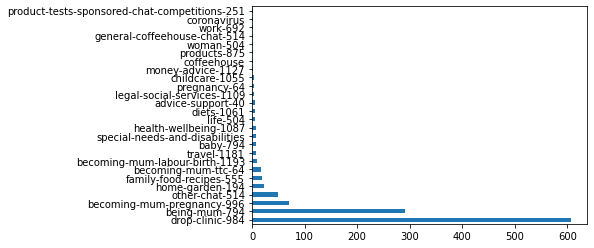

In [45]:
formula_df.forum.value_counts().plot.barh()


The results seem to be from relevant subforums for the most part. We may want to get more results from the 'product' subforum by doing PHP search limited to that subforum.

We should consider dropping results that come from subforums which aren't related to feeding babies, such as Home-Garden, Work, Woman, Legal, Travel.

<AxesSubplot:>

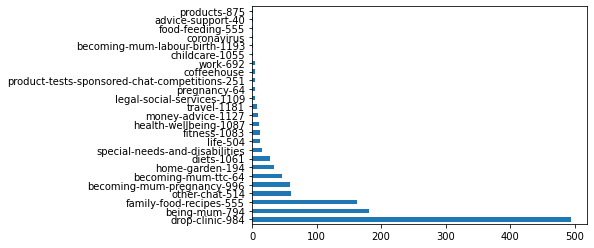

In [46]:
veg_df.forum.value_counts().plot.barh()


Diets should be removed. Other chat?? Family recipes should be removed if we are only concerned with products specifically , but if not then it's okay.

<AxesSubplot:>

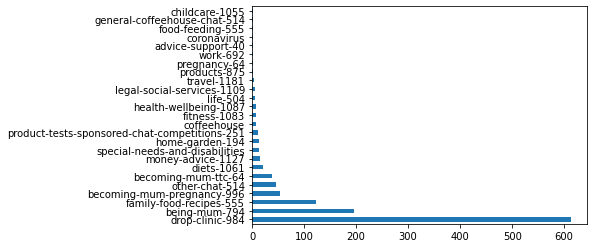

In [47]:
fruit_df.forum.value_counts().plot.barh()

<AxesSubplot:>

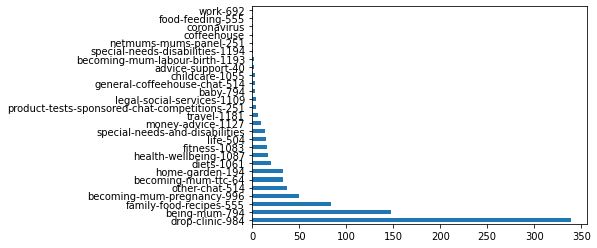

In [48]:
cereal_df.forum.value_counts().plot.barh()

Outlier groups , home garden health wellbeing etc should be removed. 

<AxesSubplot:>

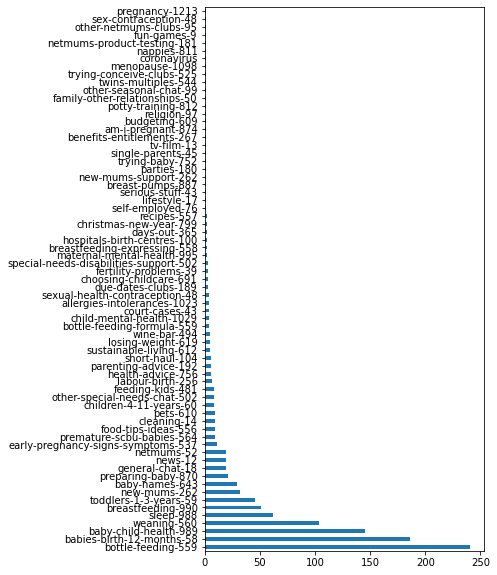

In [49]:
formula_df.subforum.value_counts().plot.barh(figsize=(5,10))

Most our results come from bottle-feeding forum which is a good sign we are capturing relevant conversation on baby formula.

We may want to drop discussion from forums such as wine, sustainable living(?), contraception, losing weight, fertility problems. We want to focus on health concerns related to the babies. 

<AxesSubplot:>

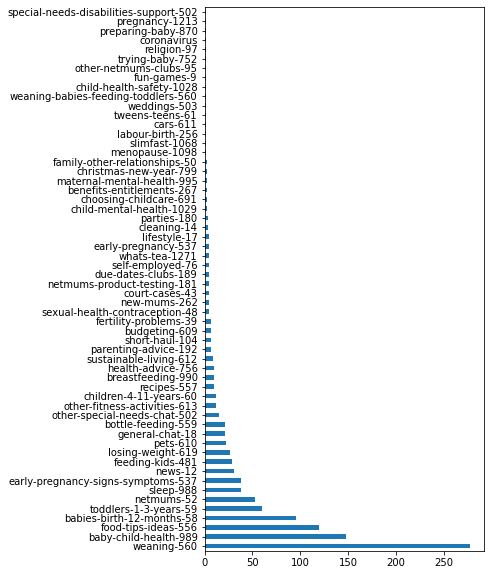

In [50]:
veg_df.subforum.value_counts().plot.barh(figsize=(5,10))

<AxesSubplot:>

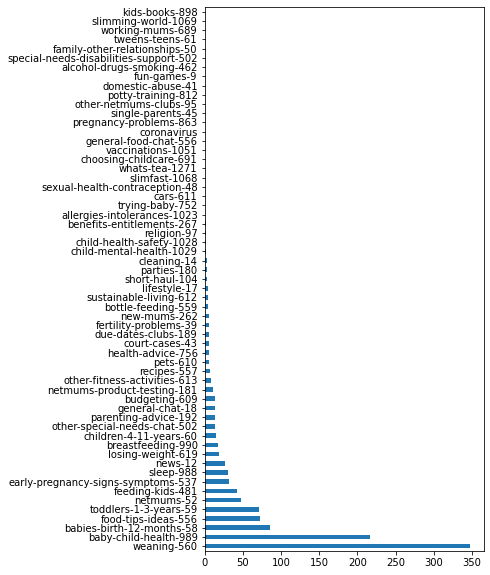

In [51]:
fruit_df.subforum.value_counts().plot.barh(figsize=(5,10))

<AxesSubplot:>

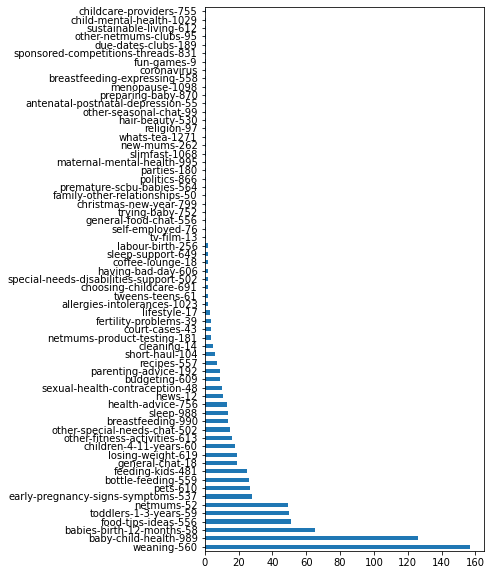

In [52]:
cereal_df.subforum.value_counts().plot.barh(figsize=(5,10))

In [53]:
# count each category of search.
formula_set

([{'link': 'https://www.netmums.com/coffeehouse/drop-clinic-984/bottle-feeding-559/201947-aptamil-hungry-baby-making-lo-sick.html',
   'title': 'Aptamil Hungry Baby making LO sick??',
   'blurb': "Oct 30, 2011 ... Thinking of making up formula like they say and then putting it in the fridge ready\nfor when she's hungry - saw that some…"},
  {'link': 'https://www.netmums.com/coffeehouse/becoming-mum-pregnancy-996/preparing-baby-870/1446482-mam-bottles.html',
   'title': 'Mam bottles',
   'blurb': 'Jan 20, 2016 ... Has anyone used the MAM anti colic self sterilising bottles? Preparing for baby.\nBoots Free MAM bottle and soother voucher.'}],
 [{'link': 'https://www.netmums.com/coffeehouse/other-chat-514/general-chat-18/722366-dead-insect-sainsburys-food.html',
   'title': 'DEAD INSECT IN SAINSBURYS FOOD!',
   'blurb': 'Feb 19, 2012 ... What would you do in your honest opinion? The family were eating strawberrys\nfreshly purchased today from sainsburys only…'},
  {'link': 'https://www.net

## Create combined DF and look at stuff..

In [54]:
all_df = pd.concat([formula_df.assign(product = 'formula'),
           veg_df.assign(product = 'veg'),
           fruit_df.assign(product = 'fruit'),
           cereal_df.assign(product = 'cereal')],
          axis=0
         )

In [55]:
all_df

,link,title,blurb,forum,subforum,product
0,https://www.netmums.com/coffeehouse/drop-clini...,Aptamil Hungry Baby making LO sick??,"Oct 30, 2011 ... Thinking of making up formula...",drop-clinic-984,bottle-feeding-559,formula
1,https://www.netmums.com/coffeehouse/becoming-m...,Mam bottles,"Jan 20, 2016 ... Has anyone used the MAM anti ...",becoming-mum-pregnancy-996,preparing-baby-870,formula
2,https://www.netmums.com/coffeehouse/other-chat...,DEAD INSECT IN SAINSBURYS FOOD!,"Feb 19, 2012 ... What would you do in your hon...",other-chat-514,general-chat-18,formula
4,https://www.netmums.com/coffeehouse/home-garde...,URGENT ADVISE NEEDED PLEASE - oven cleaner fumes,"Nov 18, 2007 ... I now want to cook fish and c...",home-garden-194,cleaning-14,formula
5,https://www.netmums.com/coffeehouse/home-garde...,buying a house near a factory is it a bad idea?,"Sep 30, 2016 ... Need some advice we have foun...",home-garden-194,sustainable-living-612,formula
...,...,...,...,...,...,...
1181,https://www.netmums.com/coffeehouse/drop-clini...,When did you start to wean your lo - Netmums,i know many people with ibs/stomach problems m...,drop-clinic-984,weaning-560,cereal
1182,https://www.netmums.com/coffeehouse/family-foo...,Food Allergies,"Charlie is on prescription milk nutramigen, an...",family-food-recipes-555,food-tips-ideas-556,cereal
1184,https://www.netmums.com/coffeehouse/drop-clini...,Threadworm Hell!!!!!! Can anyone help please? :-(,"Dec 28, 2012 ... The medicine will have killed...",drop-clinic-984,baby-child-health-989,cereal
1186,https://www.netmums.com/coffeehouse/becoming-m...,In need of advice please. :-(.,Hey. I'm 11 weeks and 5 days pregnant with my ...,becoming-mum-ttc-64,early-pregnancy-signs-symptoms-537,cereal


## TODO: combine the duplicates (same URL and same product section) 
## TODO: fix the weird indexing. ( i think they are keeping their previosu index or something...
https://stackoverflow.com/questions/35528119/pandas-recalculate-index-after-a-concatenation

In [316]:
import numpy as np

In [318]:
np.mean(all_df.blurb.str.contains('veg'))

0.08661808545876118

In [319]:
np.mean(all_df.blurb.str.contains('fruit'))

0.09291156011924478

In [320]:
np.mean(all_df.blurb.str.contains('cereal'))

0.03577343491222259

In [321]:
np.mean(all_df.blurb.str.contains('formula'))

0.07055316329910566

In [322]:
np.mean(all_df.blurb.str.contains('bacteria'))

0.018052335210334548

It seems there were not relevant results for DON (Deoxynivalenol, vomitoxin). Did we capture anything relevant?

In [324]:
np.mean(all_df.blurb.str.contains('DON'))

0.0

In [327]:
np.mean(all_df.blurb.str.contains('don\s'))

0.00016561775422325274

In [337]:
all_df.loc[all_df.blurb.str.contains('don\s')]

,link,title,blurb,forum,subforum,product
448,https://www.netmums.com/coffeehouse/other-chat...,Town v country - which is a better place to br...,"Sep 28, 2011 ... He and his family live in cen...",other-chat-514,news-12,formula


The only result that isn't from a word like 'don't' is the word 'London'. NO results are relevant.

In [349]:
from collections import Counter
words = ' '.join(all_df.blurb).split()

In [350]:
Counter(words).most_common()

[('...', 5312),
 ('and', 4373),
 ('I', 3587),
 ('to', 3335),
 ('a', 3213),
 ('the', 2979),
 ('is', 2176),
 ('of', 2005),
 ('in', 1509),
 ('baby', 1508),
 ('have', 1487),
 ('my', 1426),
 ('for', 1333),
 ('it', 1224),
 ('but', 1169),
 ('with', 1138),
 ('has', 1059),
 ('on', 979),
 ('that', 947),
 ('as', 911),
 ('food', 879),
 ('he', 874),
 ('My', 819),
 ('was', 795),
 ('you', 791),
 ('or', 725),
 ('she', 718),
 ('i', 699),
 ('her', 680),
 ('not', 674),
 ('at', 668),
 ('just', 664),
 ('so', 661),
 ('be', 647),
 ('are', 631),
 ('old', 602),
 ('had', 593),
 ('if', 568),
 ('2013', 559),
 ('2012', 550),
 ('this', 549),
 ('been', 542),
 ('can', 538),
 ('milk', 522),
 ('eat', 490),
 ('Hi', 483),
 ('from', 477),
 ('all', 477),
 ('like', 466),
 ('some', 456),
 ("I'm", 441),
 ('-', 440),
 ('when', 439),
 ('·', 432),
 ('2011', 431),
 ('fruit', 415),
 ('any', 414),
 ('months', 411),
 ('we', 410),
 ('up', 408),
 ('him', 408),
 ('would', 407),
 ('about', 407),
 ('am', 405),
 ('your', 393),
 ('do', 379

In [351]:
import nltk

In [353]:
blah = list(nltk.bigrams(words))

## Look at bigrams

In [360]:
bigramcount = Counter(blah).most_common()

In [393]:
[bigram for bigram in bigramcount if 'formula' in str(bigram[0])]

[(('the', 'formula'), 39),
 (('formula', 'fed'), 32),
 (('formula', 'and'), 32),
 (('a', 'formula'), 25),
 (('of', 'formula'), 25),
 (('to', 'formula'), 20),
 (('formula', 'milk'), 16),
 (('is', 'formula'), 16),
 (('formula', 'to'), 15),
 (('up', 'formula'), 13),
 (('formula', 'feed'), 13),
 (('formula', 'in'), 12),
 (('on', 'formula'), 12),
 (('his', 'formula'), 10),
 (('formula', 'feeding'), 9),
 (('formula', 'that'), 9),
 (('formula', 'when'), 9),
 (('formula', 'which'), 9),
 (('formula', 'for'), 9),
 (('made', 'formula'), 8),
 (('formula', '...'), 8),
 (('formula', 'at'), 8),
 (('or', 'formula'), 8),
 (('formula', 'like'), 7),
 (('and', 'formula'), 7),
 (('formula', 'I'), 7),
 (('of', 'formula…'), 7),
 (('formula', 'feeds'), 7),
 (('with', 'formula'), 7),
 (('formula', 'is'), 6),
 (('my', 'formula'), 6),
 (('formula.', '...'), 6),
 (('milk', 'formula'), 6),
 (('infant', 'formula'), 6),
 (('formula', 'milk.'), 6),
 (('neocate', 'formula'), 6),
 (("baby's", 'formula'), 6),
 (('altern

In [392]:
[bigram for bigram in bigramcount if 'metal' in str(bigram[0])]

[(('a', 'metal'), 6),
 (('the', 'metal'), 3),
 (('old', 'metal'), 2),
 (('metal', 'teapot'), 2),
 (('like', 'metal'), 2),
 (('metal', 'music'), 2),
 (('with', 'metal…'), 2),
 (('metal', 'bar'), 2),
 (('glass,', 'metal?'), 2),
 (('container,', '(metal'), 2),
 (('(metal', 'objects'), 2),
 (('metal', 'reusable'), 2),
 (('funky', 'metal/space'), 2),
 (('metal/space', 'park,'), 2),
 (('(the', 'metal'), 1),
 (('metal', 'ones'), 1),
 (('metal', 'one?'), 1),
 (('metal…', 'Hi,'), 1),
 (('of', 'metal'), 1),
 (('metal', 'in'), 1),
 (('metal?', "There's"), 1),
 (('some', 'metal'), 1),
 (('metal', 'spoons'), 1),
 (('the', 'metal…'), 1),
 (('metal…', 'May'), 1),
 (('metal', 'ring'), 1),
 (('taste', 'metal!'), 1),
 (('metal!', '...'), 1),
 (('with', 'metal'), 1),
 (('metal', '...…'), 1),
 (('heavy', 'metal'), 1),
 (('metal', 'which'), 1),
 (('large', 'metal'), 1),
 (('metal', 'fruit'), 1),
 (('metal?', '...'), 1),
 (('strong', 'metalic'), 1),
 (('metalic', 'taste'), 1),
 (('metal…', 'Do'), 1),
 (('me

In [391]:
[bigram for bigram in bigramcount if 'preservatives' in str(bigram[0])]

[(('no', 'preservatives,…'), 4),
 (('the', 'preservatives'), 3),
 (('preservatives', 'in'), 3),
 (('are', 'preservatives...maybe'), 3),
 (('preservatives...maybe', 'try'), 3),
 (('preservatives', 'and'), 3),
 (('and', 'preservatives'), 3),
 (('no', 'preservatives'), 3),
 (('as', 'preservatives…'), 2),
 (('fillers,', 'preservatives'), 2),
 (('...', 'preservatives'), 2),
 (('preservatives', 'so'), 2),
 (('preservatives', 'rather'), 2),
 (('preservatives', 'are'), 2),
 (('preservatives', 'that'), 1),
 (('preservatives…', 'Under'), 1),
 (('preservatives…', 'Apr'), 1),
 (('of', 'preservatives'), 1),
 (('any', 'preservatives'), 1),
 (('preservatives', 'etc,'), 1),
 (('...', 'preservatives,'), 1),
 (('preservatives,', 'would'), 1),
 (('and', 'preservatives.…'), 1),
 (('preservatives.…', 'Mar'), 1),
 (('preservatives,…', 'Aug'), 1),
 (('extra', 'preservatives'), 1),
 (('preservatives', 'or'), 1),
 (('preservatives,…', 'Hi'), 1),
 (('preservatives', 'other'), 1),
 (('preservatives,…', 'I'), 1),

## Check if link URLs from searches ever return pages OTHER THAN the start fo the thread.


In [419]:
all_df.loc[all_df.link.str.contains('-[0-9].html')]

11      https://www.netmums.com/coffeehouse/drop-clini...
12      https://www.netmums.com/coffeehouse/drop-clini...
15      https://www.netmums.com/coffeehouse/home-garde...
19      https://www.netmums.com/coffeehouse/general-co...
24      https://www.netmums.com/coffeehouse/drop-clini...
                              ...                        
1167    https://www.netmums.com/coffeehouse/drop-clini...
1177    https://www.netmums.com/coffeehouse/drop-clini...
1182    https://www.netmums.com/coffeehouse/family-foo...
1184    https://www.netmums.com/coffeehouse/drop-clini...
1189    https://www.netmums.com/coffeehouse/family-foo...
Name: link, Length: 508, dtype: object

In [413]:
all_df.loc[0]

,link,title,blurb,forum,subforum,product
0,https://www.netmums.com/coffeehouse/drop-clini...,Aptamil Hungry Baby making LO sick??,"Oct 30, 2011 ... Thinking of making up formula...",drop-clinic-984,bottle-feeding-559,formula
0,https://www.netmums.com/coffeehouse/other-chat...,DEAD INSECT IN SAINSBURYS FOOD!,"Feb 19, 2012 ... What would you do in your hon...",other-chat-514,general-chat-18,veg
0,https://www.netmums.com/coffeehouse/drop-clini...,Multiple allergies & weaning!,"Hi, I work as a private nanny, currently with ...",drop-clinic-984,weaning-560,fruit
0,https://www.netmums.com/coffeehouse/drop-clini...,Multiple allergies & weaning!,"Hi, I work as a private nanny, currently with ...",drop-clinic-984,weaning-560,cereal


In [420]:
list(all_df.loc[all_df.link.str.contains('-[0-9].html')].link)

['https://www.netmums.com/coffeehouse/drop-clinic-984/baby-child-health-989/766615-please-help-eczema-2.html',
 'https://www.netmums.com/coffeehouse/drop-clinic-984/baby-child-health-989/766615-please-help-eczema-2.html',
 'https://www.netmums.com/coffeehouse/home-garden-194/cleaning-14/779331-where-do-you-use-bleach-around-house-3.html',
 'https://www.netmums.com/coffeehouse/general-coffeehouse-chat-514/news-12/941704-row-over-advice-pregnant-women-play-safe-2.html',
 'https://www.netmums.com/coffeehouse/drop-clinic-984/bottle-feeding-559/938816-warm-bottle-30-secs-anyone-else-do-2.html',
 'https://www.netmums.com/coffeehouse/family-food-recipes-555/food-tips-ideas-556/840648-healthy-non-processed-cheap-foodie-thread-3.html',
 'https://www.netmums.com/coffeehouse/drop-clinic-984/bottle-feeding-559/826668-made-up-bottle-procedure-2.html',
 'https://www.netmums.com/coffeehouse/drop-clinic-984/baby-child-health-989/947811-hv-advised-i-put-nesquick-babys-milk-2.html',
 'https://www.netmum

In [13]:
all_df

NameError: name 'all_df' is not defined